Business Problem

As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

Research Question

Which sd platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import scipy.stats as st

Data Description

The dataset comprises a collection of data comparising the performance of two seperate ad campaigns conducted throughour the year 2019. Specifically, the data coveres a Facebook Ad campaign and an AdWorks ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 days of campaign data for analysis. The datset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key Features:

Date: The date corresponding to each row of campaign data, ranging from January 1st,2019, to December 31st,2019.
Ad Views: The number of times the ad was viewed.
Ad Clicks: The number clicks received on the ad.
Ad Conversion: The number of conversions resulting from the ad.
Cost per Ad: the cost associated with running the Facebook ad campaign.
Click Through Rate(CTR): The ratio of clicks to views , indicating the effectiveness of the ad in generating clicks.
Conversion Rate: The ratio of conversions to views , reflecting the effectiveness of the ad in driving desired actions.
Cost per Click(CPC): The average cost incurred per click on the ad.

In [2]:
df = pd.read_csv("D:/Pyhton/A_B_testing_dataset.csv")
df

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-12-17,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74
996,2024-12-18,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14
998,2024-12-20,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98


# Exploratory Data Analysis

In [3]:
df.shape

(1000, 17)

In [4]:
df.dtypes

date_of_campaign             object
facebook_ad_campaign         object
facebook_ad_views             int64
facebook_ad_clicks            int64
facebook_ad_conversions       int64
facebook_cost_per_ad          int64
facebook_ctr                float64
facebook_conversion_rate    float64
facebook_cost_per_click     float64
adword_ad_campaign           object
adword_ad_views               int64
adword_ad_clicks              int64
adword_ad_conversions         int64
adword_cost_per_ad            int64
adword_ctr                  float64
adword_conversion_rate      float64
adword_cost_per_click       float64
dtype: object

In [5]:
df['date_of_campaign'] = pd.to_datetime(df['date_of_campaign'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_campaign          1000 non-null   datetime64[ns]
 1   facebook_ad_campaign      1000 non-null   object        
 2   facebook_ad_views         1000 non-null   int64         
 3   facebook_ad_clicks        1000 non-null   int64         
 4   facebook_ad_conversions   1000 non-null   int64         
 5   facebook_cost_per_ad      1000 non-null   int64         
 6   facebook_ctr              1000 non-null   float64       
 7   facebook_conversion_rate  1000 non-null   float64       
 8   facebook_cost_per_click   1000 non-null   float64       
 9   adword_ad_campaign        1000 non-null   object        
 10  adword_ad_views           1000 non-null   int64         
 11  adword_ad_clicks          1000 non-null   int64         
 12  adword_ad_conversions

In [6]:
df.describe()

,date_of_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-07-04 07:13:26.399999744,2152.031000,44.196000,11.975000,156.610000,2.28316,32.696080,4.310500,4771.438000,60.128000,5.933000,124.741000,1.280950,10.807510,2.265540
min,2021-12-22 00:00:00,1050.000000,15.000000,5.000000,60.000000,0.49000,6.850000,0.960000,3715.000000,31.000000,3.000000,50.000000,0.540000,3.370000,0.580000
25%,2022-10-07 18:00:00,1600.250000,30.000000,8.000000,110.000000,1.36750,18.052500,2.337500,4258.250000,45.000000,4.000000,86.000000,0.940000,6.970000,1.470000
50%,2023-07-20 12:00:00,2123.500000,44.500000,12.000000,156.000000,2.07000,27.120000,3.600000,4808.500000,60.000000,6.000000,124.000000,1.260000,9.720000,2.030000
75%,2024-03-24 00:00:00,2706.250000,58.000000,16.000000,205.000000,2.92250,41.880000,5.610000,5300.750000,75.000000,8.000000,163.000000,1.570000,13.485000,2.802500
max,2024-12-20 00:00:00,3320.000000,73.000000,19.000000,250.000000,6.86000,118.750000,16.530000,5754.000000,89.000000,9.000000,200.000000,2.370000,29.030000,6.190000
std,NaN,661.982166,16.833328,4.298471,54.918904,1.20670,20.570796,2.751582,598.647684,17.047822,2.011606,43.809053,0.402492,5.205133,1.101846


In [7]:
df.isnull().sum()

date_of_campaign            0
facebook_ad_campaign        0
facebook_ad_views           0
facebook_ad_clicks          0
facebook_ad_conversions     0
facebook_cost_per_ad        0
facebook_ctr                0
facebook_conversion_rate    0
facebook_cost_per_click     0
adword_ad_campaign          0
adword_ad_views             0
adword_ad_clicks            0
adword_ad_conversions       0
adword_cost_per_ad          0
adword_ctr                  0
adword_conversion_rate      0
adword_cost_per_click       0
dtype: int64

# Comparining Campaign Performance

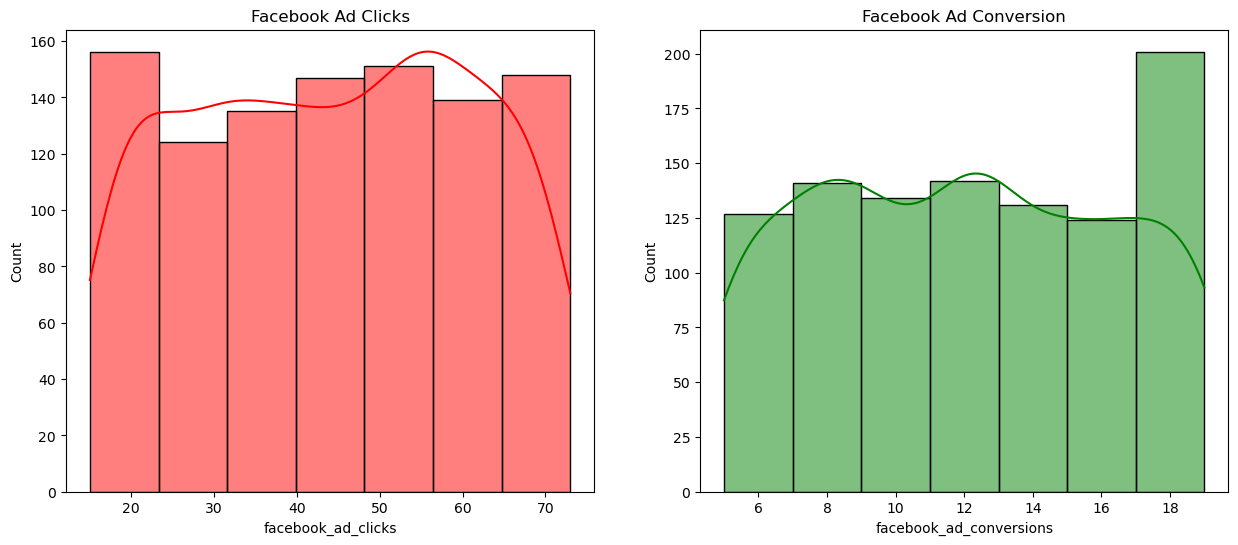

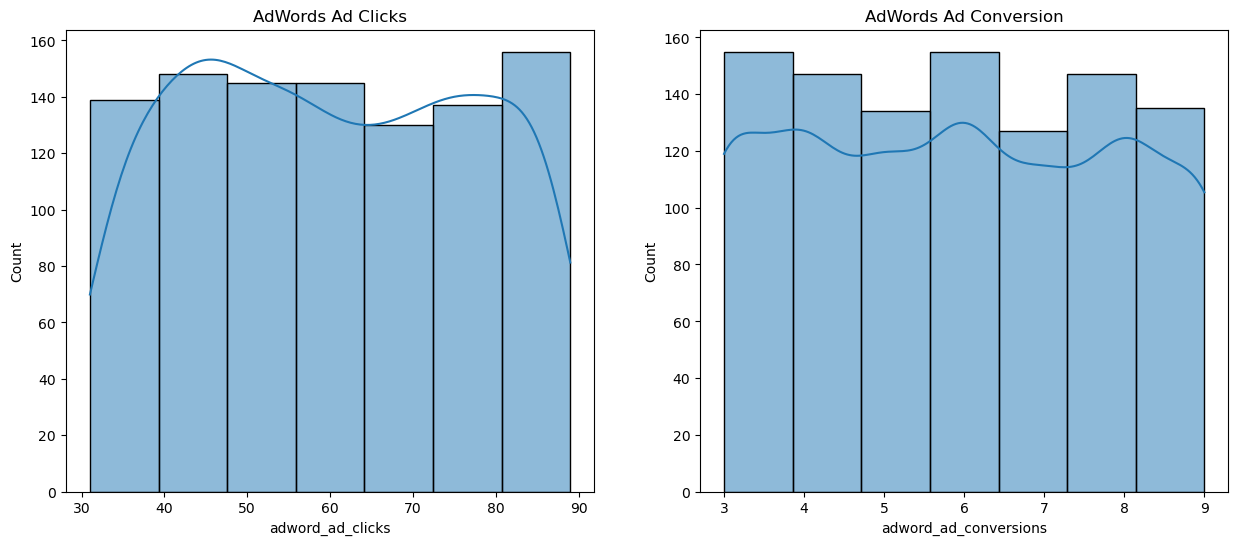

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['facebook_ad_clicks'], bins=7, kde=True, color= 'red')
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversion')
sns.histplot(df['facebook_ad_conversions'], bins=7, kde=True, color='green')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['adword_ad_clicks'], bins=7, kde= True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversion')
sns.histplot(df['adword_ad_conversions'], bins=7, kde=True)
plt.show()

All the histogran are showing somewhat symmetrical shape. This symmetrical shape suggest that the number of clicks and conversion is relatively evenly distributed. In other words, ther are not many clicks or conversions that are outliers on either the high or low end.

# How frequently do we observe days with high numbers of conversions compared to days with low numbers of conversions?

In [9]:
def create_conversion_category(conversion_col):
    category=[]
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6<= conversion <11:
            category.append('6-10')
        elif 11 <= conversion < 16:
            category.append('10-15')
        else:
            category.append('more than15')
    return category

df['facebook_conversion_category'] = create_conversion_category('facebook_ad_conversions')
df['adwords_conversion_category'] = create_conversion_category('adword_ad_conversions')
            

In [10]:
df

,date_of_campaign,facebook_ad_campaign,facebook_ad_views,facebook_ad_clicks,facebook_ad_conversions,facebook_cost_per_ad,facebook_ctr,facebook_conversion_rate,facebook_cost_per_click,adword_ad_campaign,adword_ad_views,adword_ad_clicks,adword_ad_conversions,adword_cost_per_ad,adword_ctr,adword_conversion_rate,adword_cost_per_click,facebook_conversion_category,adwords_conversion_category
0,2021-12-22,FACEBOOK AD,3172,62,14,141,1.95,22.58,2.27,ADWORD AD,5754,64,9,177,1.11,14.06,2.77,10-15,6-10
1,2021-12-24,FACEBOOK AD,3211,38,9,186,1.18,23.68,4.89,ADWORD AD,4954,73,6,54,1.47,8.22,0.74,6-10,6-10
2,2021-12-25,FACEBOOK AD,1936,53,15,66,2.74,28.30,1.25,ADWORD AD,4702,38,9,187,0.81,23.68,4.92,10-15,6-10
3,2021-12-25,FACEBOOK AD,1194,45,9,71,3.77,20.00,1.58,ADWORD AD,3718,58,3,161,1.56,5.17,2.78,6-10,less than 6
4,2021-12-26,FACEBOOK AD,2479,44,12,174,1.77,27.27,3.95,ADWORD AD,5562,63,4,162,1.13,6.35,2.57,10-15,less than 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-12-17,FACEBOOK AD,1154,56,8,161,4.85,14.29,2.88,ADWORD AD,4275,73,3,54,1.71,4.11,0.74,6-10,less than 6
996,2024-12-18,FACEBOOK AD,1108,58,13,198,5.23,22.41,3.41,ADWORD AD,4749,55,5,116,1.16,9.09,2.11,10-15,less than 6
997,2024-12-18,FACEBOOK AD,1866,70,19,97,3.75,27.14,1.39,ADWORD AD,4582,36,4,149,0.79,11.11,4.14,more than15,less than 6
998,2024-12-20,FACEBOOK AD,1279,59,19,171,4.61,32.20,2.90,ADWORD AD,4877,66,6,65,1.35,9.09,0.98,more than15,6-10


In [11]:
conversion_category_facebook = df['facebook_conversion_category'].value_counts().reset_index().set_index('facebook_conversion_category').rename(columns={"count": "facebook_conversion_count"}).iloc[[3,1,0,2]]
conversion_category_facebook

,facebook_conversion_count
facebook_conversion_category,
less than 6,65
6-10,337
10-15,341
more than15,257


In [12]:
conversion_category_adwords = df['adwords_conversion_category'].value_counts().reset_index().set_index('adwords_conversion_category').rename(columns={"count": "adwords_conversion_count"}).iloc[[1,0]]
conversion_category_adwords

,adwords_conversion_count
adwords_conversion_category,
less than 6,436
6-10,564


In [13]:
conversion_category = pd.concat([conversion_category_adwords, conversion_category_facebook],axis=1).fillna(0)
conversion_category.index.name = "ID"
conversion_category

,adwords_conversion_count,facebook_conversion_count
ID,,
less than 6,436.0,65
6-10,564.0,337
10-15,0.0,341
more than15,0.0,257


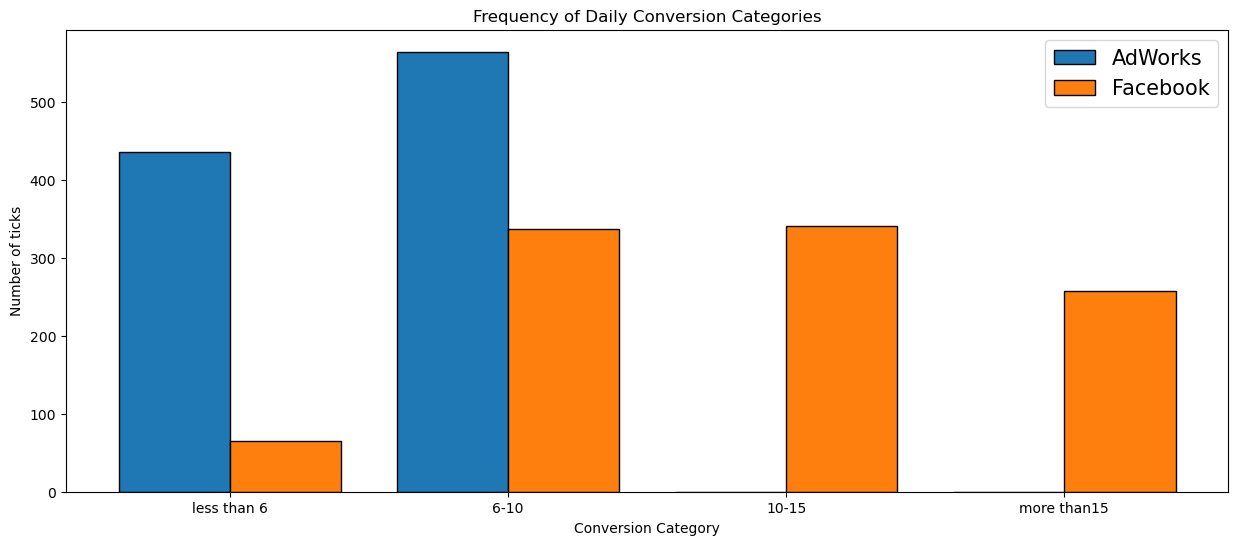

In [14]:
plt.figure(figsize=(15,6))
plt.bar(np.arange(len(conversion_category))-0.2, conversion_category['adwords_conversion_count'], 0.4, label='AdWorks', linewidth=1, edgecolor='k')
plt.bar(np.arange(len(conversion_category))+0.2, conversion_category['facebook_conversion_count'], 0.4, label='Facebook', linewidth=1, edgecolor='k')
plt.xticks(np.arange(len(conversion_category)), conversion_category.index)
plt.xlabel('Conversion Category')
plt.ylabel('Number of ticks')
plt.title('Frequency of Daily Conversion Categories')
plt.legend(fontsize=15)
plt.show()

The data suggests Facebook had more frequent higher conversion days than AdWorks, which either had very low conversion rates or moderate ones
There is a significant variance in the number of high-conversion days between two different campaigns
The absence of any days with conversions between 10-15 and more than 15 in AdWords indicate a need to review what stratergies were changed ot whar external factors could have influenced these numbers.

# Do more clicks on the ad lead to more sales?

<Axes: >

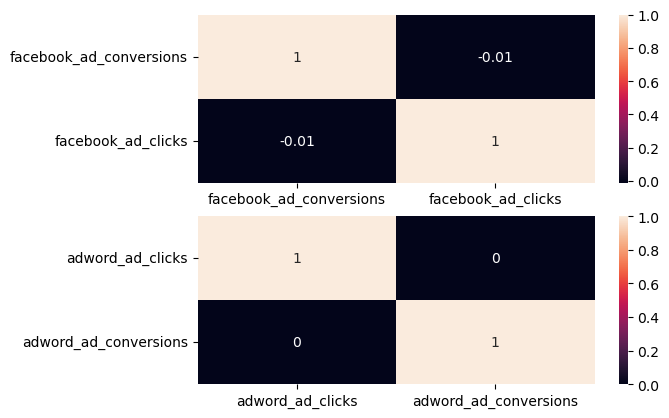

In [15]:
plt.subplot(2,1,1)
sns.heatmap(round(df[['facebook_ad_conversions','facebook_ad_clicks']].corr(),2),annot= True)
plt.subplot(2,1,2)
sns.heatmap(round(df[['adword_ad_clicks','adword_ad_conversions']].corr(),2),annot= True)

More clicks do not result in more conversion. Infact there is no correction between clicks and conversion both for adword and facebook

# Hypothesis Testing

Hypothesis: Advertising on Facebook will result in a greater number of conversions compared to advertising on Adwords.

Null Hypothesis: There is no difference in the number of conversion between Facebook and AdWords or the number of conversion from AdWords than or equal to those from Facebook
Alternative Hypothesis: The number of conversion from Facebook is greater than the number of conversion from AdWords.

In [16]:
print('Mean Conversion \n------------------')
print('Facebook:', round(df['facebook_ad_conversions'].mean(),2))
print('AdWords:', round(df['adword_ad_conversions'].mean(),2))

t_stats, p_value= st.ttest_ind(a= df['facebook_ad_conversions'], b= df['adword_ad_conversions'], equal_var= False)
print('\nT statistic', t_stats, '\np-value', p_value)

if p_value <0.05:
    print('\np-value  is less than significance value, Reject the null hypothesis')
else:
    print('\np-value is greater than significance value, Accept the null hypothesis')

Mean Conversion 
------------------
Facebook: 11.98
AdWords: 5.93

T statistic 40.25906231407935 
p-value 6.886351887267426e-237

p-value  is less than significance value, Reject the null hypothesis


The mean number of conversion from Facebook ads is substantially higher than the mean number of conversion from AdWords ads. This suggest that on average, Facebook advertising is more effective in generating conversion compared to AdWords advertising.

The T test is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistics indicate a greater difference between the means of the two groups.

The p-value is extremely small, indicating strong evidence against the null hypothesis.

The results strongly support the alternative hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the numbr of conversions from AdWords advertising.

Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords based on the sample data analyzed.

Given the signidicant difference in conversion rates between between Facebook and AdWords consider rellocating resources towards Facebook advertising efforts. This could involve increasing ad spent, expanding targeting efforts or experimenting with different ad formats to capitalize on the platfoems effectiveness in driving conversion.

# Regression

In [17]:
X=df[['facebook_ad_clicks','facebook_ad_conversions']]
y=df[['facebook_conversion_rate']]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
le = LinearRegression()
le.fit(X_train, y_train)
y_pred=le.predict(X_test)

r2 = r2_score(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)

print('Accuracy:', r2)

Accuracy: 82.51930803580103


# Monthly, Weekly and Yearly Conversion of Facebook Ads

In [18]:
df['month']= df['date_of_campaign'].dt.month
df['week'] = df['date_of_campaign'].dt.weekday

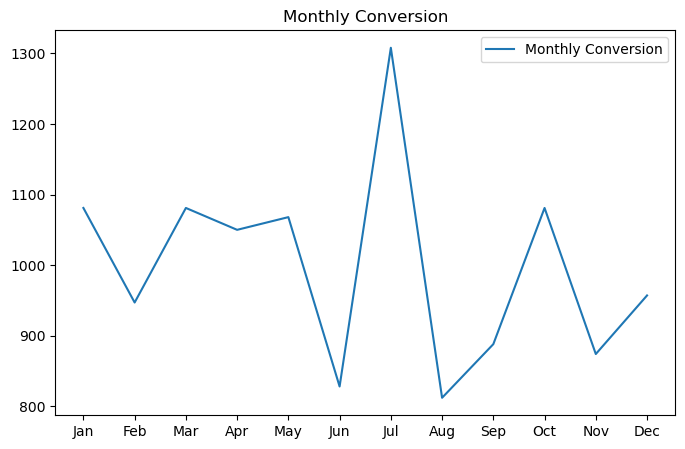

In [19]:
plt.figure(figsize=(8,5))
plt.title('Monthly Conversion')
montly_conversions= df.groupby('month')[['facebook_ad_conversions']].sum()
month_names= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names, montly_conversions['facebook_ad_conversions'], label='Monthly Conversion')
plt.legend()

<BarContainer object of 7 artists>

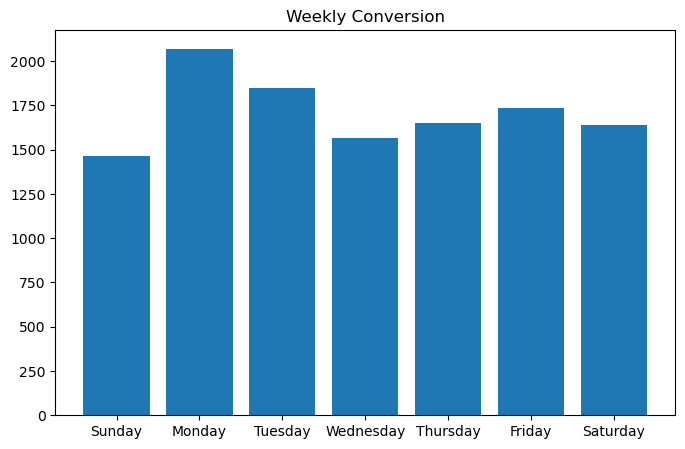

In [20]:
plt.figure(figsize=(8,5))
plt.title('Weekly Conversion')
weekly_conversions= df.groupby('week')[['facebook_ad_conversions']].sum()
weekly_names= ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(weekly_names, weekly_conversions['facebook_ad_conversions'])

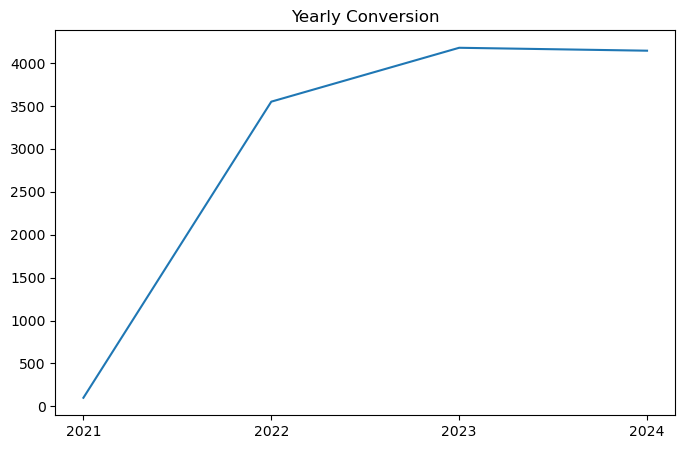

In [21]:
df['year'] = df['date_of_campaign'].dt.year

plt.figure(figsize=(8,5))
plt.title('Yearly Conversion')
yearly_conversions= df.groupby('year')[['facebook_ad_conversions']].sum()
yearly_names= ['2021','2022','2023','2024']
plt.plot(yearly_names, yearly_conversions['facebook_ad_conversions'])

Across the weekdays over the year the total number of conversions remain relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsivesness to marketing efforts.

Examing the monthly trend in conversion reveals an overall upward trajectory, indicating a general increase i conversions over time. However,certain months stand out with variations in conversion rates. experienced a decline in comparison to neighbouring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behaviour or adjustments in marketing stratergies.

# Change in cost per conversion over time

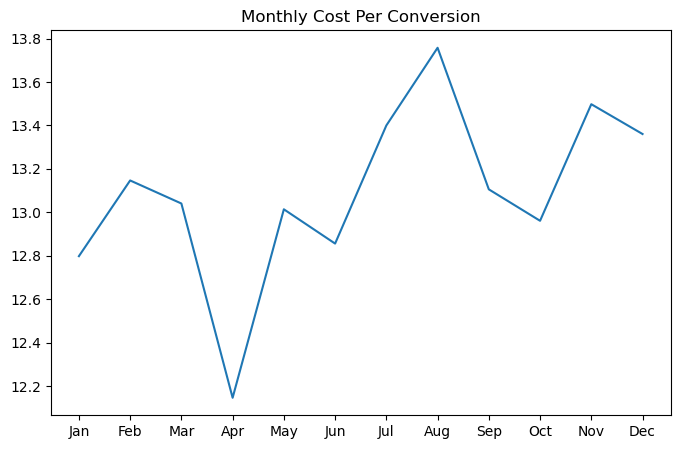

In [22]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion')
monthly_df= df.groupby('month')[['facebook_cost_per_ad','facebook_ad_conversions']].sum()
monthly_df['Cost per Conversion'] = monthly_df['facebook_cost_per_ad']/monthly_df['facebook_ad_conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'])

The CPC trend over the 12 month period show fluctuations but overall maintains a relatively stable range.

April has the lowest CPC value, indicating potentially more cost-effective advertising or higher conversion rates during these periods.

August has the highest CPC, suggesting that advertising costs may be relatively higher.

Lower CPC values in certain months could indicate periods of higher advertising or more favourable market conditions.

Consider allocating more advertising budget to months with historaically lower CPC.

# Is there a long-term equilibrium relationship between advertising and conversion rates that suggest a stable, propotional impact of budget changes on conversion over time.

In [24]:
score, p_value,_ =coint(df['facebook_cost_per_ad'],df['facebook_ad_conversions'])
print('Cointegreation test score', score)
print('p-values:', p_value)

if p_value<0.05:
    print('\np-value is less than significance value, Reject the null hypothesis')
else:
    print('\np-value is greater than significance value, Accept the null hypothesis')

Cointegreation test score -31.71894313242047
p-values: 0.0

p-value is less than significance value, Reject the null hypothesis
